<a href="https://colab.research.google.com/github/EvaAgustini/Data-Analytic/blob/main/UAS_EvaAgustini_DataAnalytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [5]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [12]:
ls

'CC GENERAL.csv'    kaggle.json              marketing_campaign.xlsx
'Classified Data'   marketing_campaign.csv   Wine.csv


In [9]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

In [14]:
#datayı df içerisne atarak okuyoruz
df = pd.read_csv('CC GENERAL.csv')
# yapılacak işlem zamnında orjinal datanın kaybolmaması için "data" kopyalıyourz
data = df.copy()
# sütunların isimleri büyük harf olduğu için küçük harfe dönüştürüyoruz
data.columns = data.columns.str.lower()
data.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [15]:
#datanın uç noktalarını ve ayrıntılı özellikleri için describe uyguluyoruz
data.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [16]:
#satır ve sütun sayısına bakıyoruz
data.shape

(8950, 18)

In [17]:
#data hakkında sütun isimlerini ve içerik sayısına bakarak hangi türde veri olduğuna ve kabaca eksik veri var mı ona bakıyoruz
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [18]:
#null yani boş değer sorguluoruz (false = 0) ve topluyoruz bu şekilde kayıp veriyi tespit edebiliyoruz
data.isnull().sum().sort_values(ascending=False)
#minumum_payments verisinden 313 veri eksik olduğunu
#credit_limit değerinden 1 veri eksik olduğunu anlıyoruz

minimum_payments                    313
credit_limit                          1
cust_id                               0
balance                               0
prc_full_payment                      0
payments                              0
purchases_trx                         0
cash_advance_trx                      0
cash_advance_frequency                0
purchases_installments_frequency      0
oneoff_purchases_frequency            0
purchases_frequency                   0
cash_advance                          0
installments_purchases                0
oneoff_purchases                      0
purchases                             0
balance_frequency                     0
tenure                                0
dtype: int64

In [19]:
# eksik olan verilerin yüzdesini hesaplayarak eksik olan verinin silinmesi durumunda ne kadar önem sahip olduğunu görebiliriz
(df.isnull().sum()/data['cust_id'].count())*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [21]:
data.dropna(inplace=True)

In [22]:
# Cust_ID, model oluşturma için ihtiyaç duymayacağımız bir sütundur, bu yüzden çıkarıyoruz
data.drop('cust_id', axis=1, inplace=True)

In [23]:
data.shape

(8636, 17)

In [24]:
o_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()

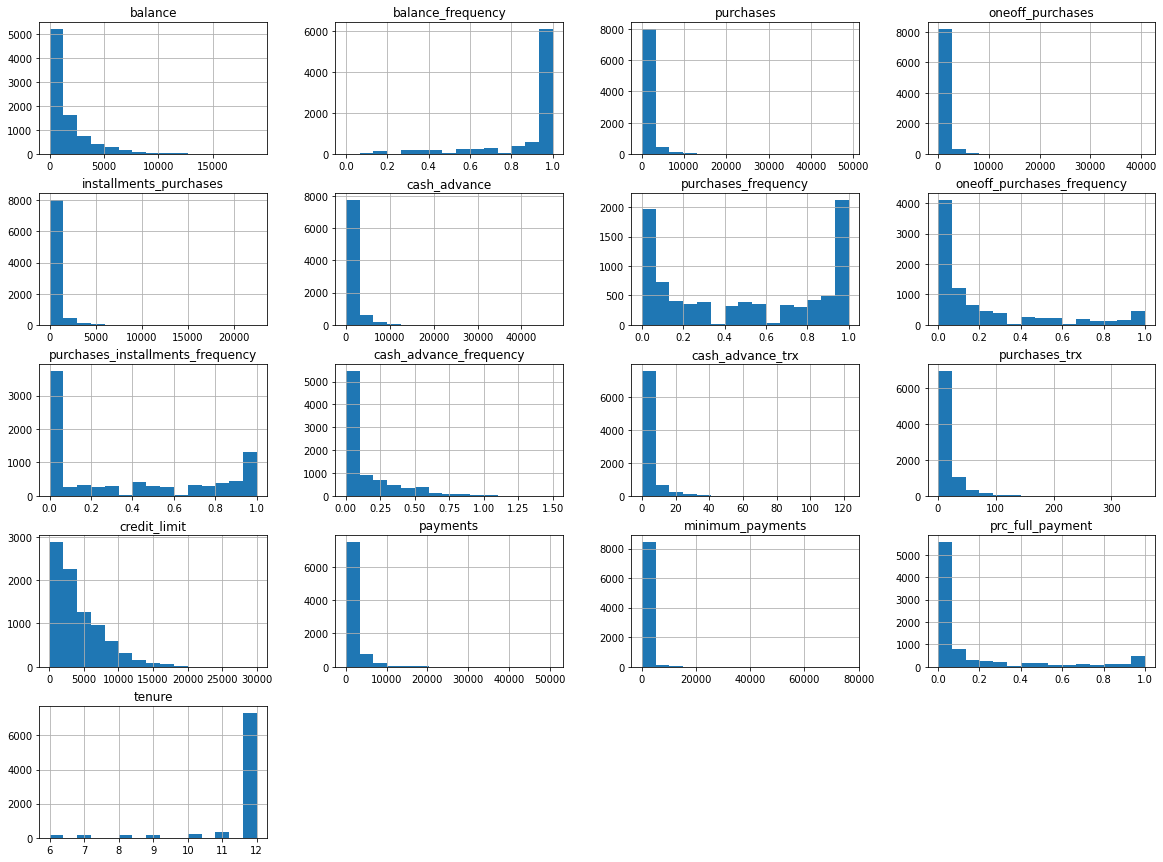

In [25]:
# her sütunun dağılımını göreselleştiriyoruz
data[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));

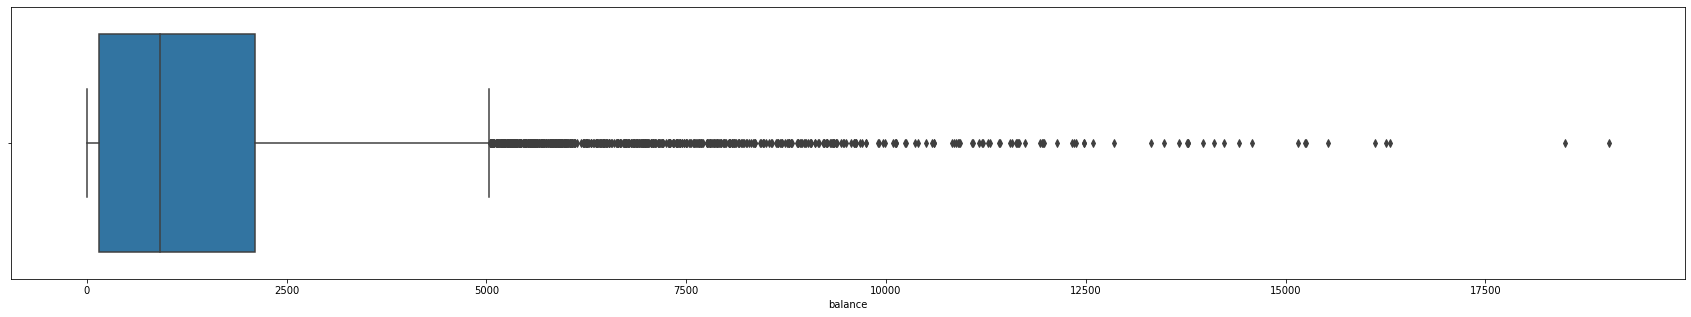

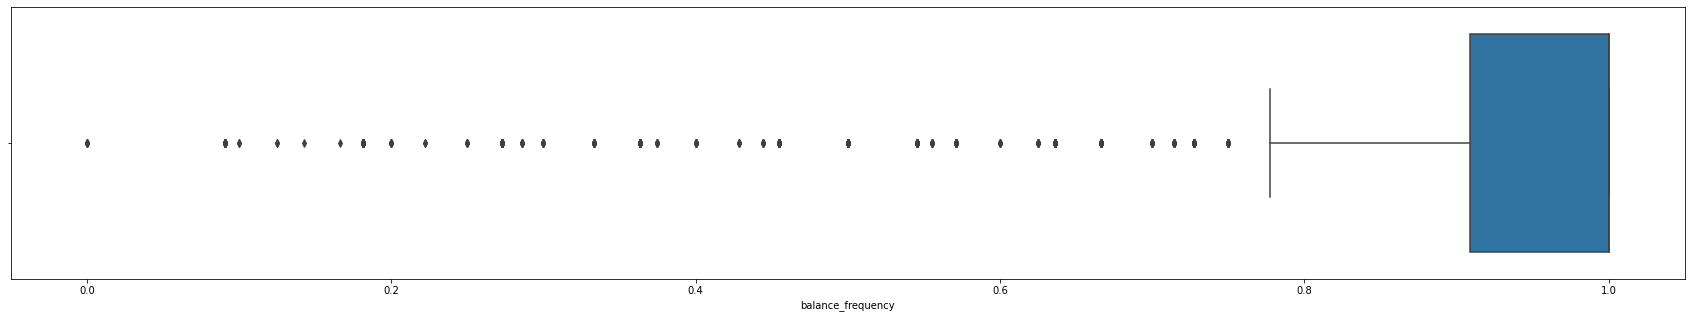

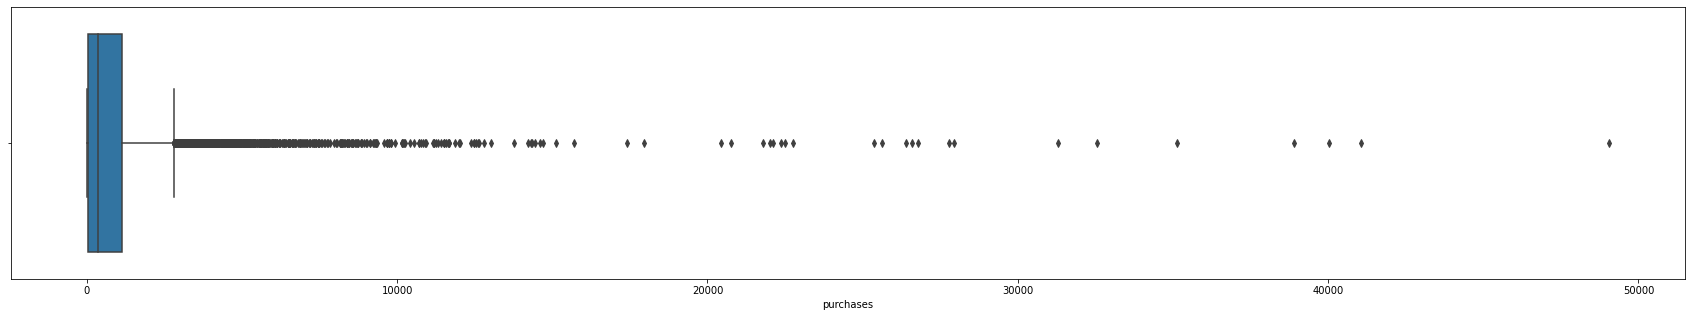

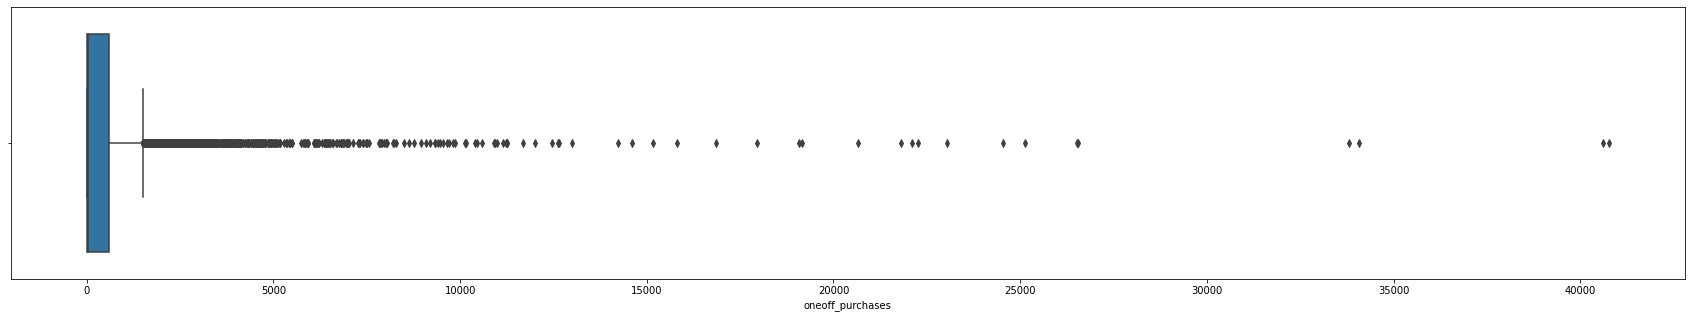

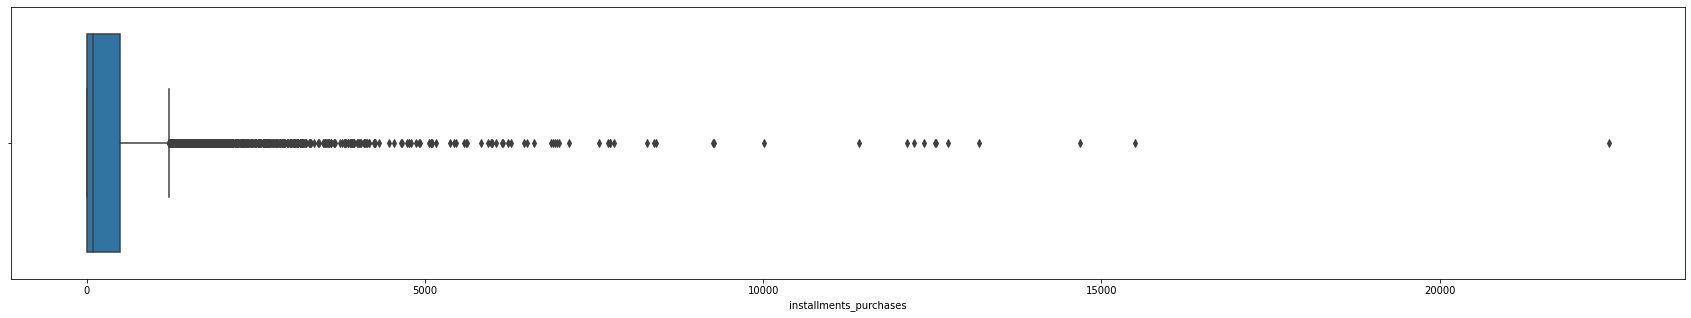

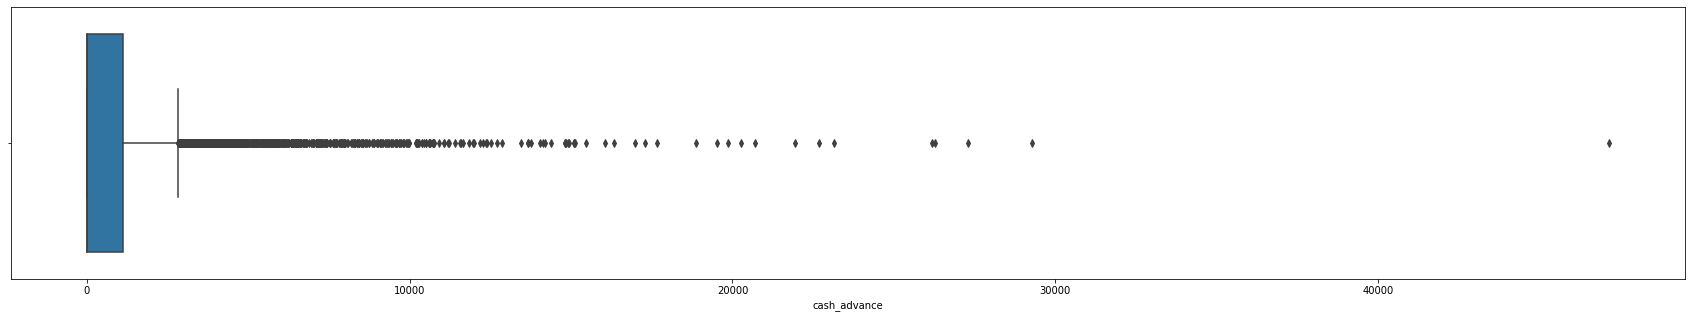

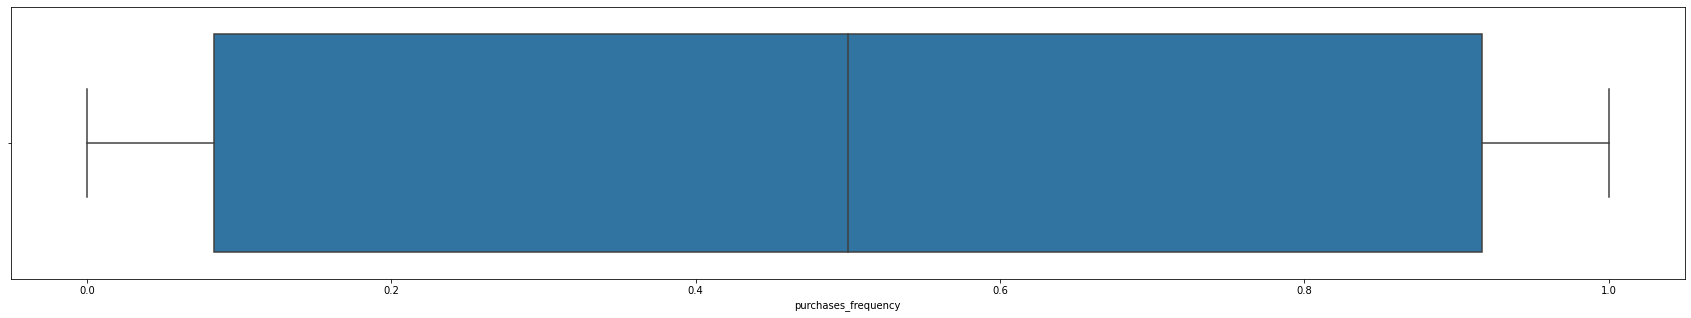

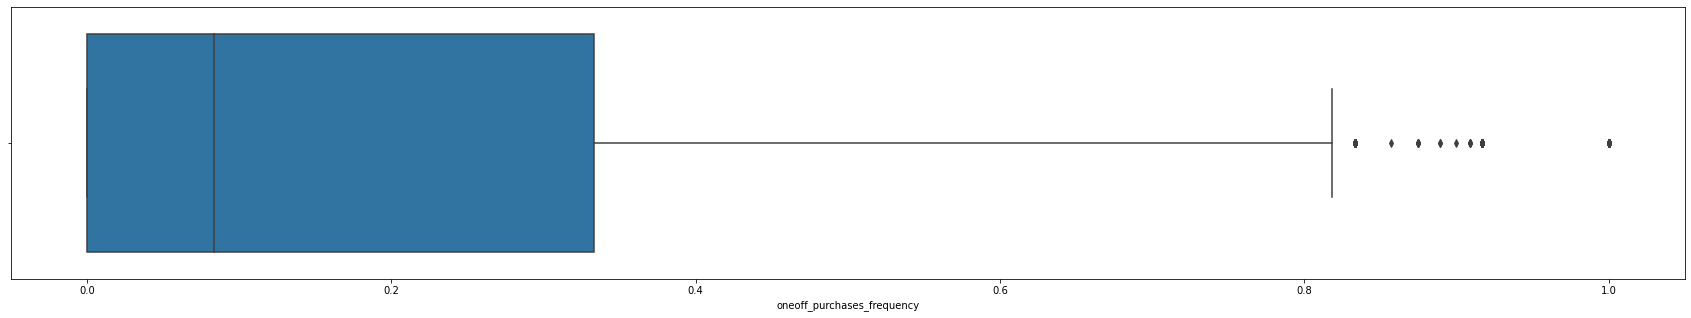

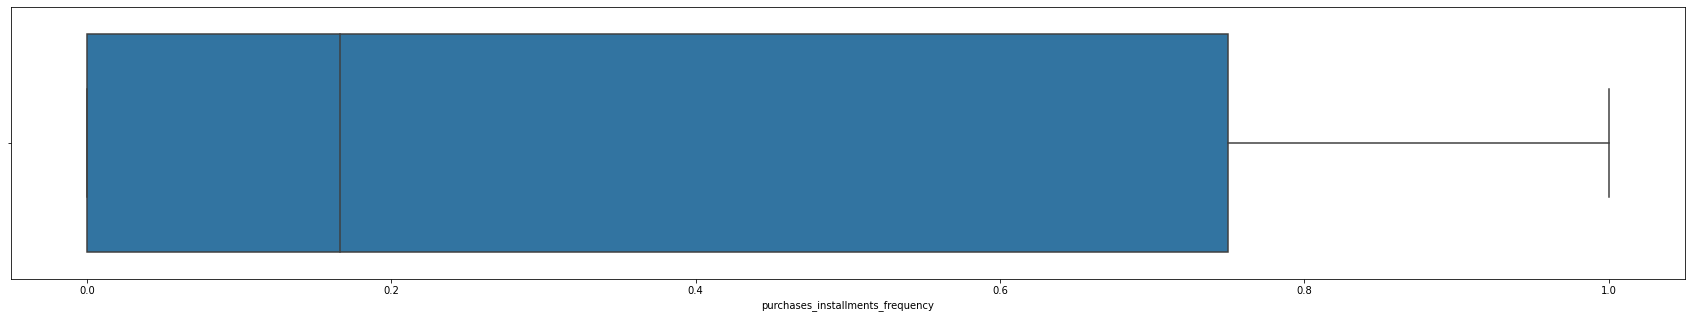

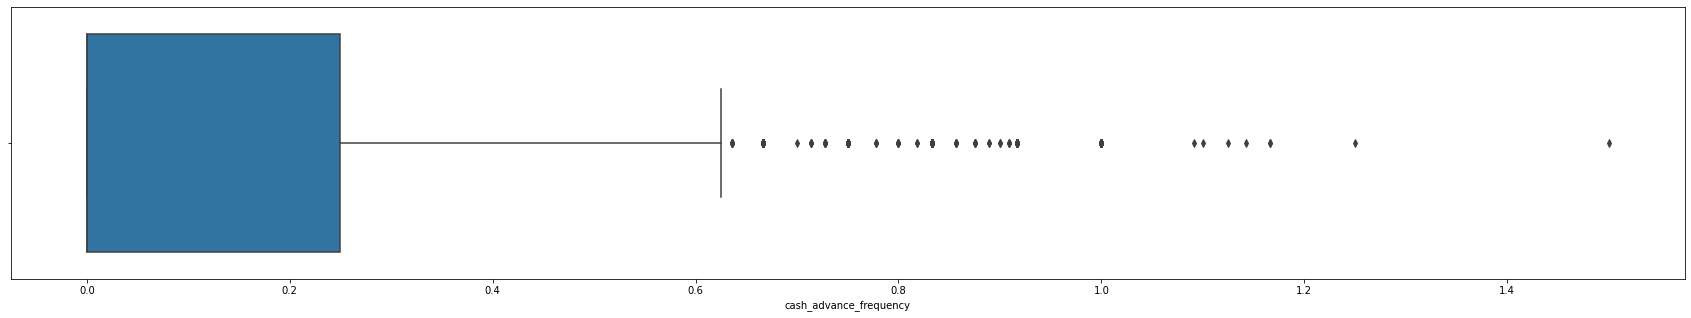

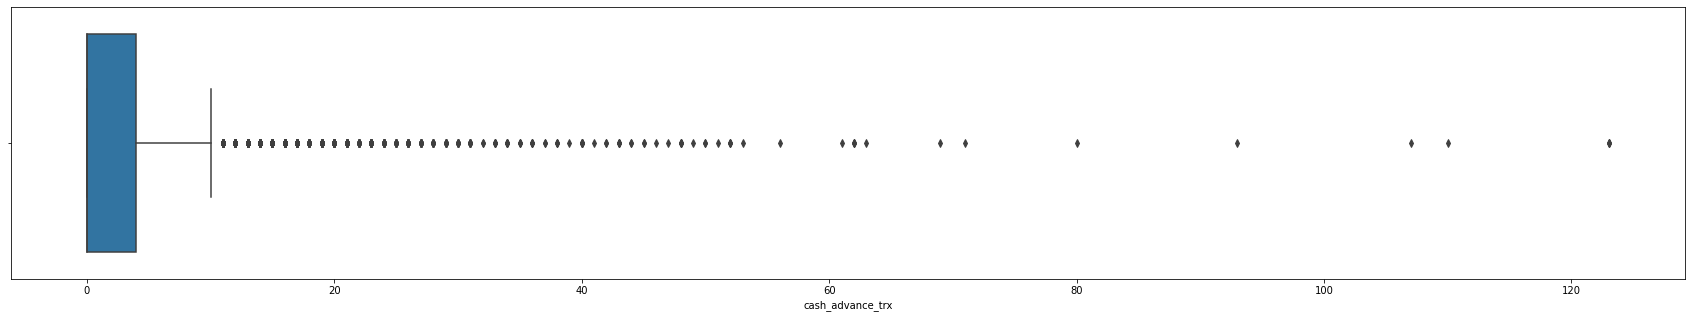

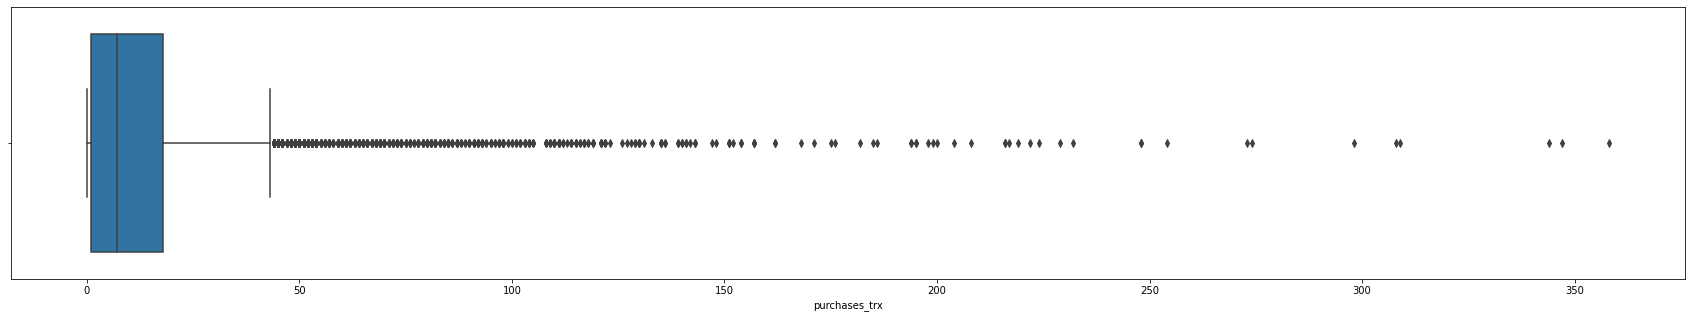

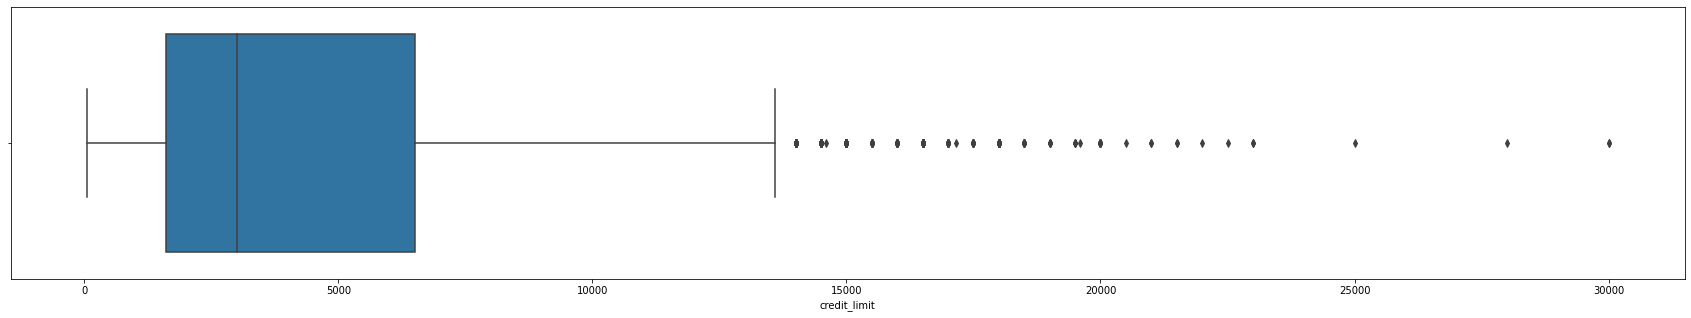

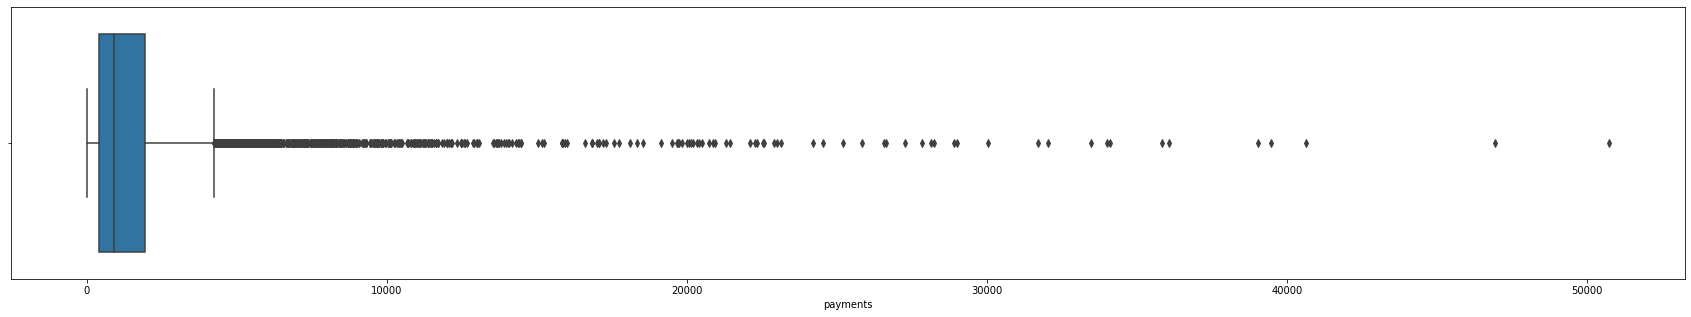

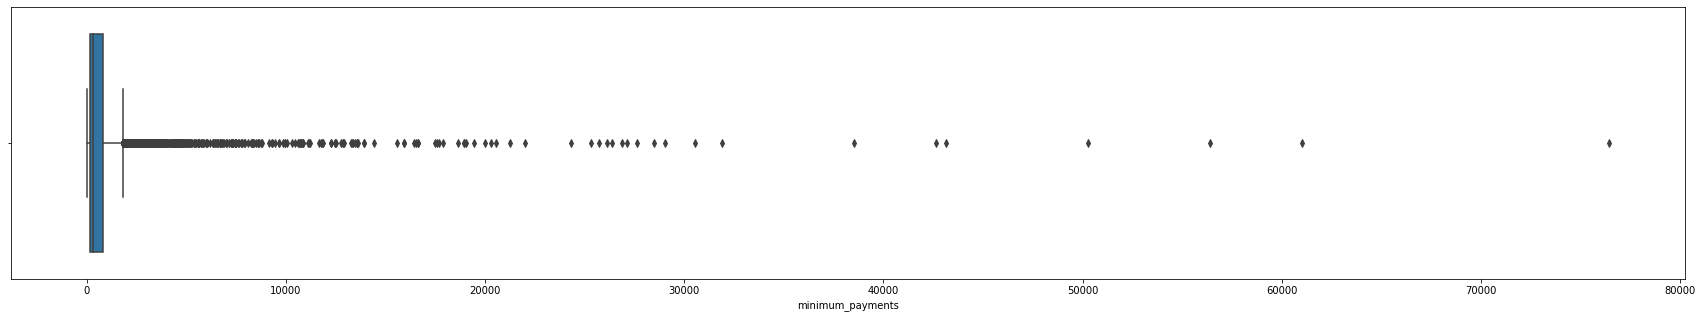

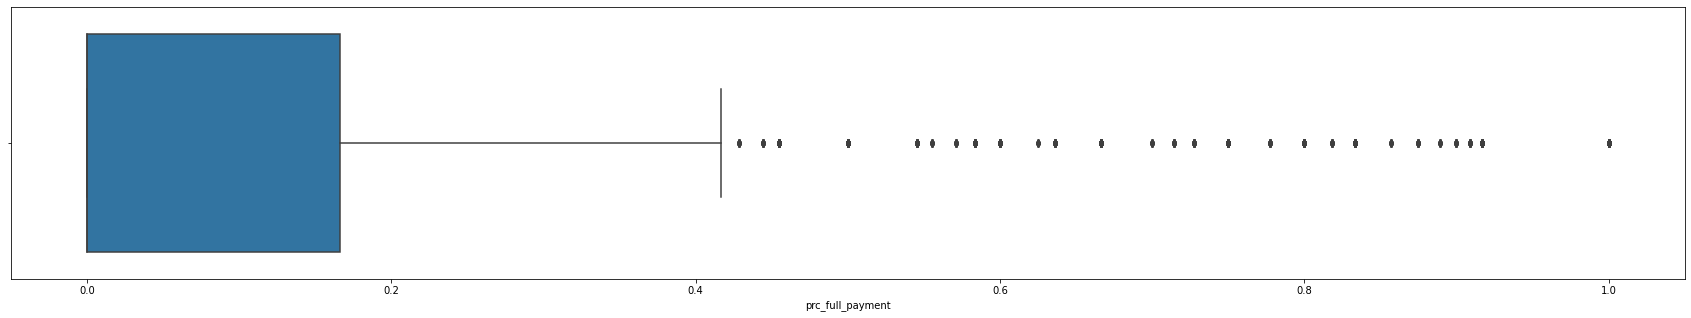

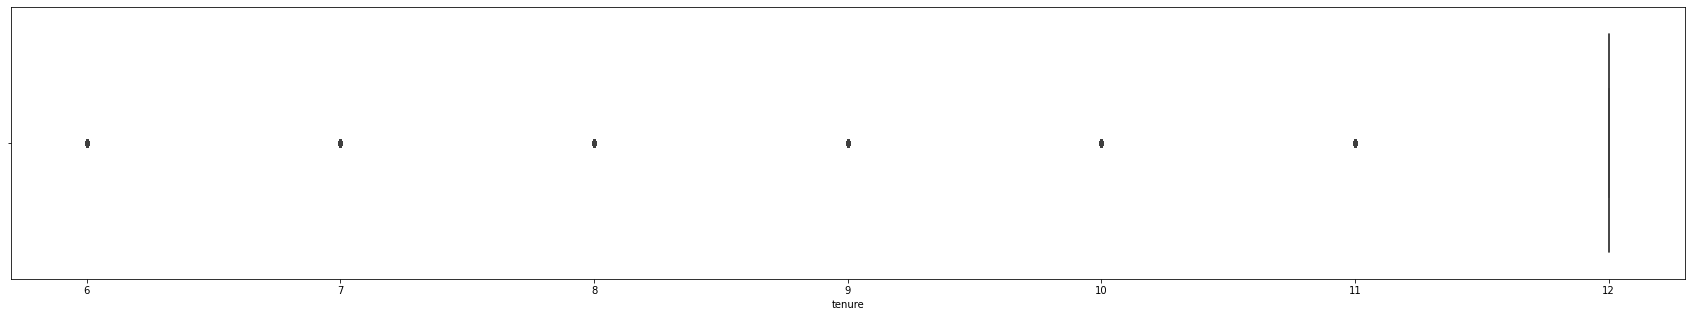

In [26]:
for column in data.columns:
    plt.figure(figsize = (30,5))
    sns.boxplot(data[column])
    plt.show()

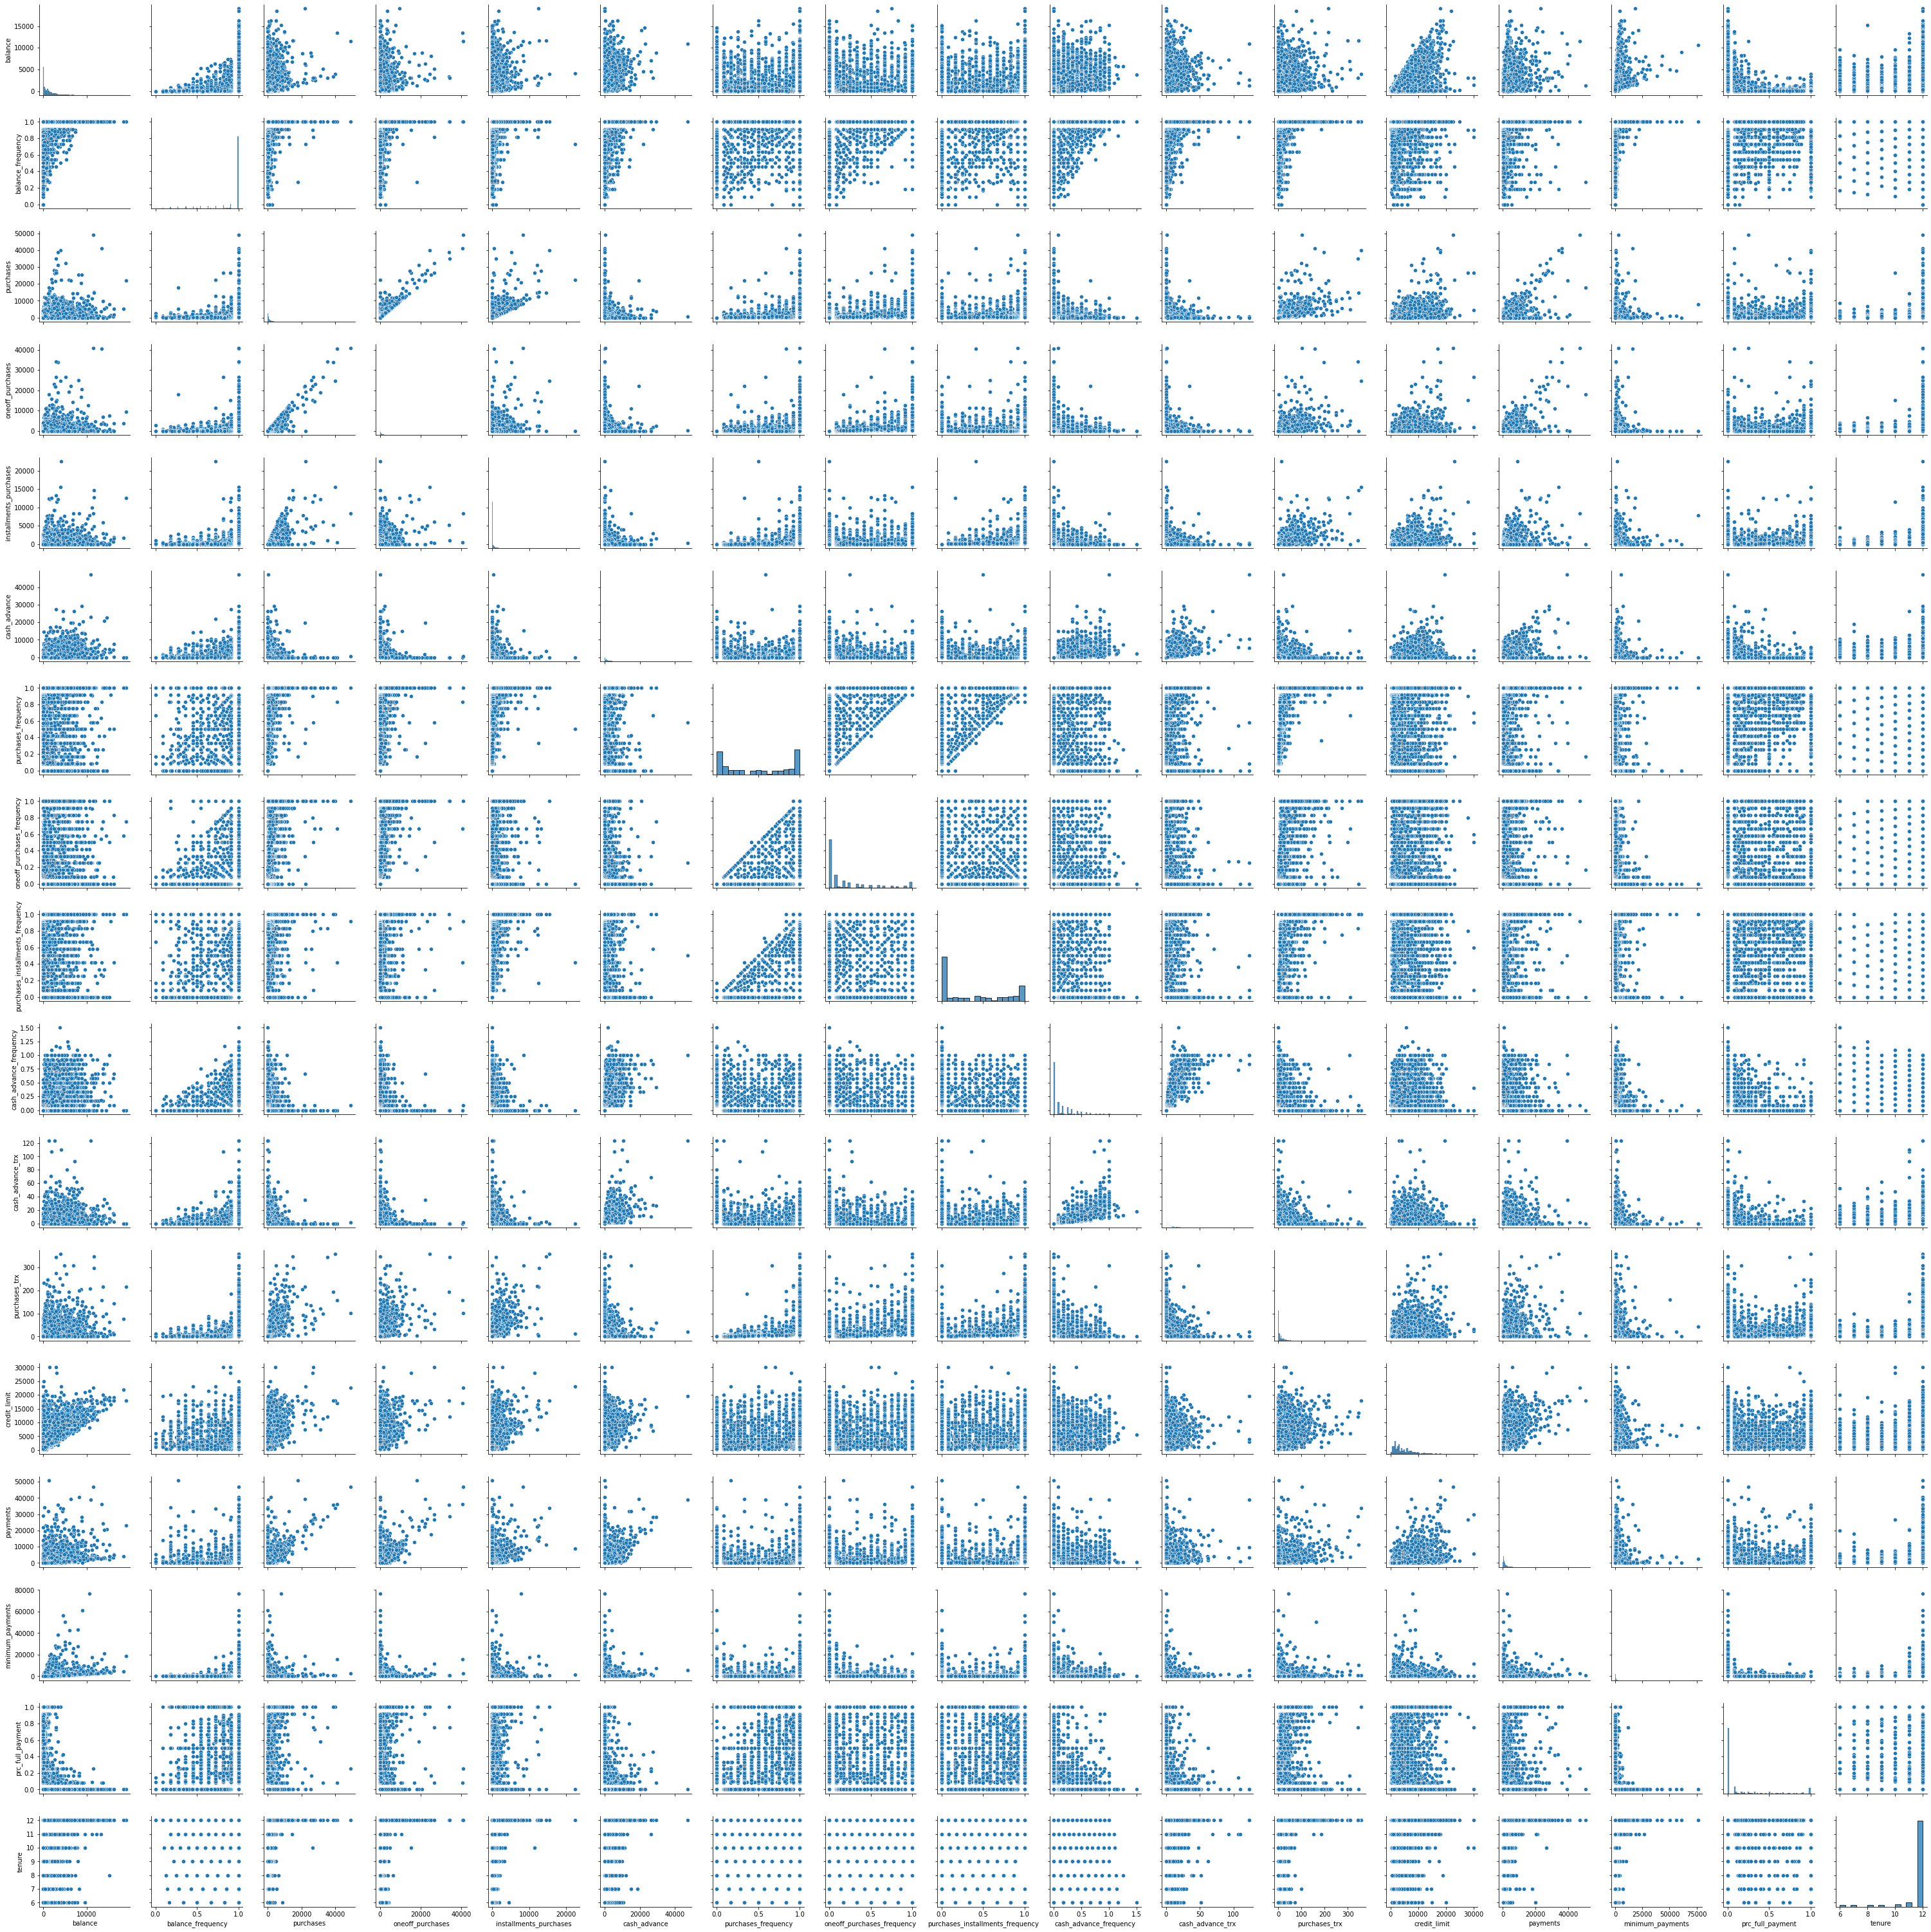

In [27]:
sns.pairplot(data)
plt.show()

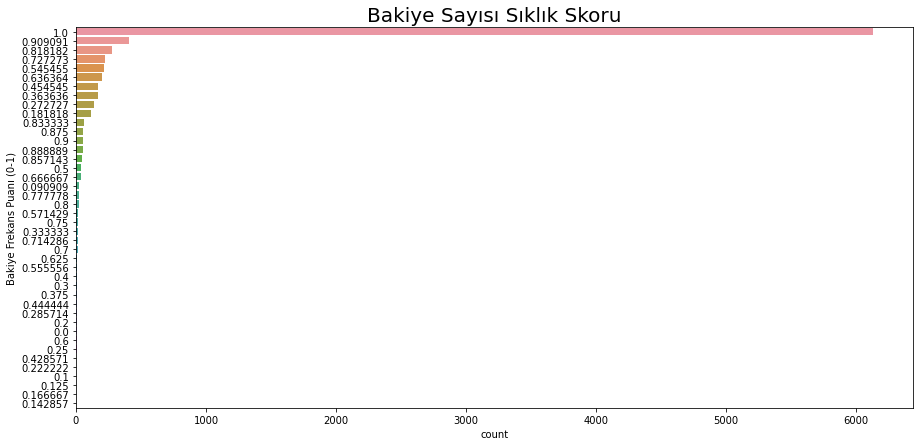

In [28]:
plt.rcParams['figure.figsize'] = (15,7)

sns.countplot(y=data['balance_frequency'],order = data['balance_frequency'].value_counts().index)
plt.ylabel('Bakiye Frekans Puanı (0-1)')
plt.title('Bakiye Sayısı Sıklık Skoru', fontsize=20)
plt.show()

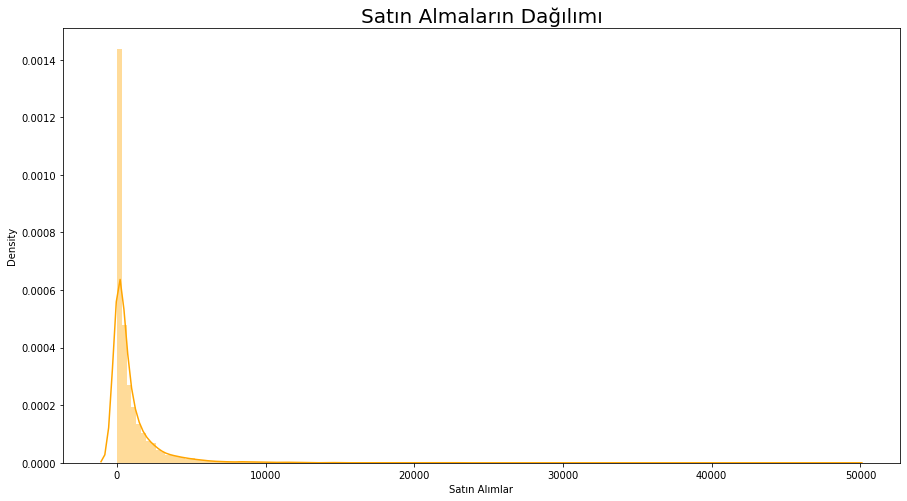

In [29]:
plt.rcParams['figure.figsize'] = (15,8)

sns.distplot(data['purchases'], color='orange', bins=150)
plt.title('Satın Almaların Dağılımı', size=20)
plt.xlabel('Satın Alımlar')
plt.show()

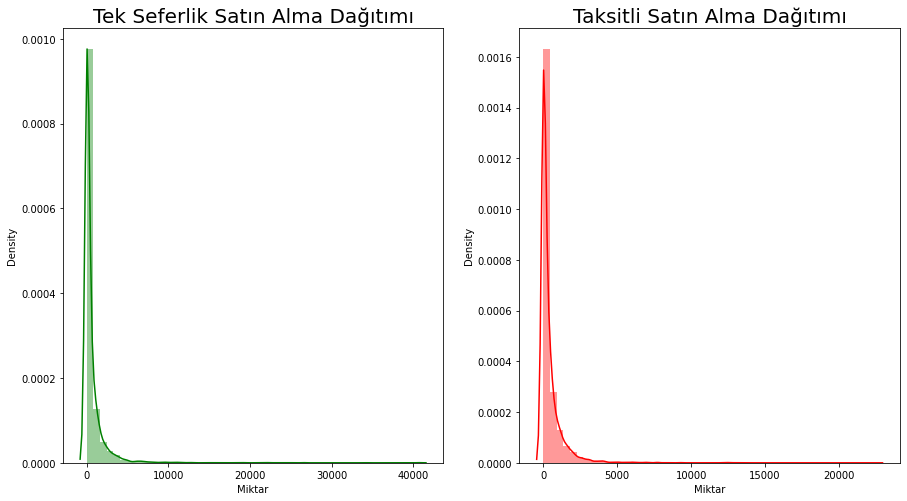

In [30]:
plt.subplot(1,2,1)
sns.distplot(data['oneoff_purchases'],color='green')
plt.title('Tek Seferlik Satın Alma Dağıtımı', fontsize = 20)
plt.xlabel('Miktar')


plt.subplot(1,2,2)
sns.distplot(data['installments_purchases'], color='red')
plt.title('Taksitli Satın Alma Dağıtımı', fontsize = 20)
plt.xlabel('Miktar')
plt.show()

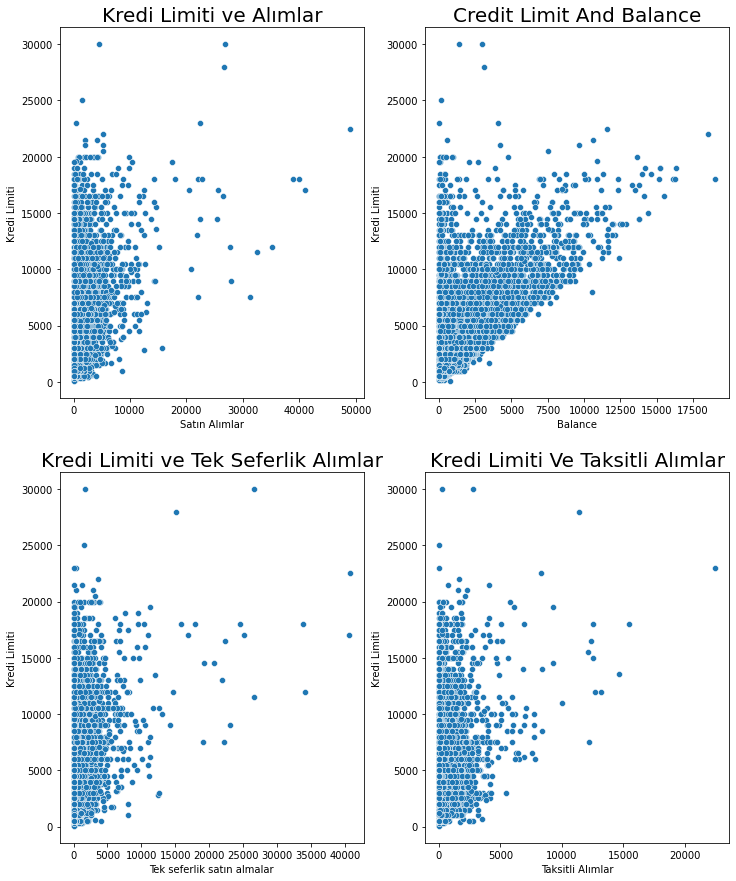

In [31]:
plt.rcParams['figure.figsize'] = (12,15)

plt.subplot(2,2,1)
sns.scatterplot(data['purchases'],data['credit_limit'])
plt.title('Kredi Limiti ve Alımlar', fontsize =20)
plt.xlabel('Satın Alımlar')
plt.ylabel('Kredi Limiti')

plt.subplot(2,2,2)
sns.scatterplot(data['balance'],data['credit_limit'])
plt.title('Credit Limit And Balance', fontsize =20)
plt.xlabel('Balance')
plt.ylabel('Kredi Limiti')
plt.subplot(2,2,3)
sns.scatterplot(data['oneoff_purchases'],data['credit_limit'])
plt.title('Kredi Limiti ve Tek Seferlik Alımlar', fontsize =20)
plt.xlabel('Tek seferlik satın almalar')
plt.ylabel('Kredi Limiti')

plt.subplot(2,2,4)
sns.scatterplot(data['installments_purchases'],data['credit_limit'])
plt.title('Kredi Limiti Ve Taksitli Alımlar', fontsize =20)
plt.xlabel('Taksitli Alımlar')
plt.ylabel('Kredi Limiti')

plt.show()

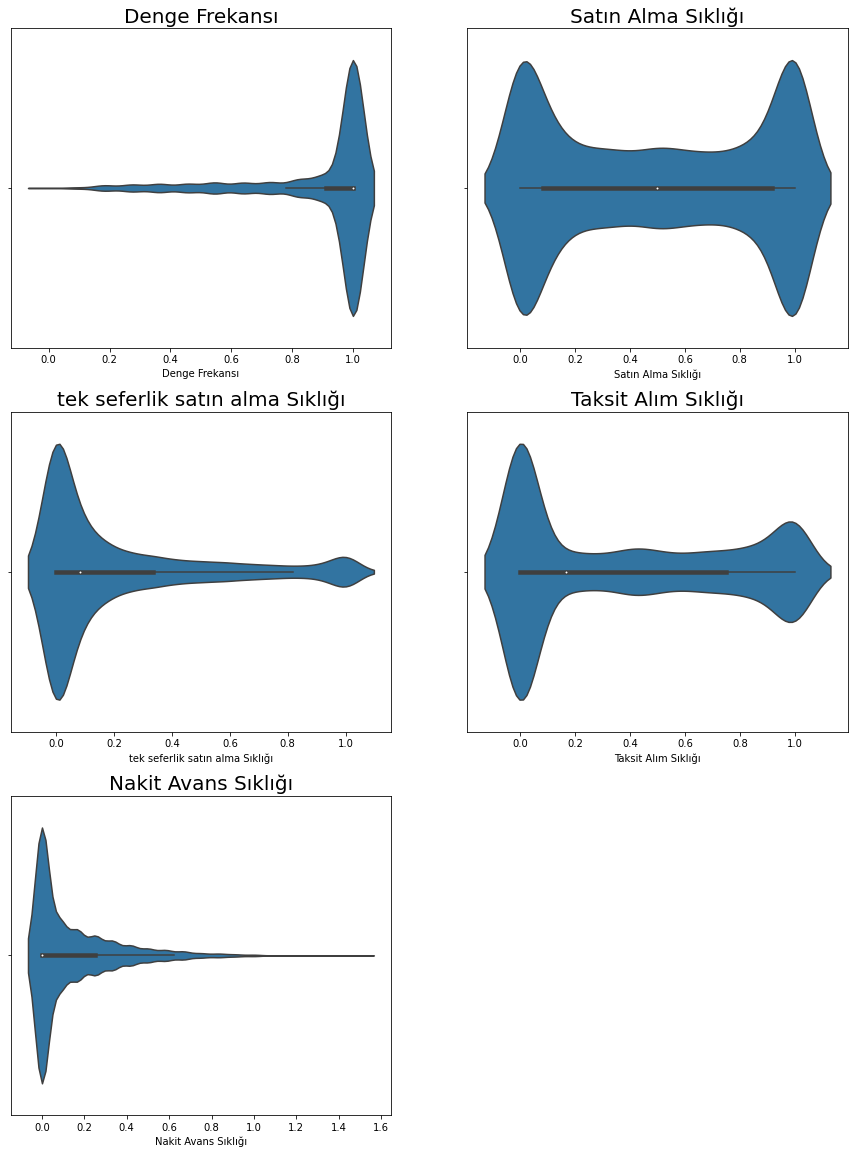

In [32]:
plt.rcParams['figure.figsize'] = (15,20)

plt.subplot(3,2,1)
sns.violinplot(data['balance_frequency'])
plt.title('Denge Frekansı', fontsize =20)
plt.xlabel('Denge Frekansı')

plt.subplot(3,2,2)
sns.violinplot(data['purchases_frequency'])
plt.title('Satın Alma Sıklığı', fontsize =20)
plt.xlabel('Satın Alma Sıklığı')

plt.subplot(3,2,3)
sns.violinplot(data['oneoff_purchases_frequency'])
plt.title('tek seferlik satın alma Sıklığı', fontsize =20)
plt.xlabel('tek seferlik satın alma Sıklığı')
plt.subplot(3,2,4)
sns.violinplot(data['purchases_installments_frequency'])
plt.title('Taksit Alım Sıklığı', fontsize =20)
plt.xlabel('Taksit Alım Sıklığı')

plt.subplot(3,2,5)
sns.violinplot(data['cash_advance_frequency'])
plt.title('Nakit Avans Sıklığı', fontsize =20)
plt.xlabel('Nakit Avans Sıklığı')

plt.show()

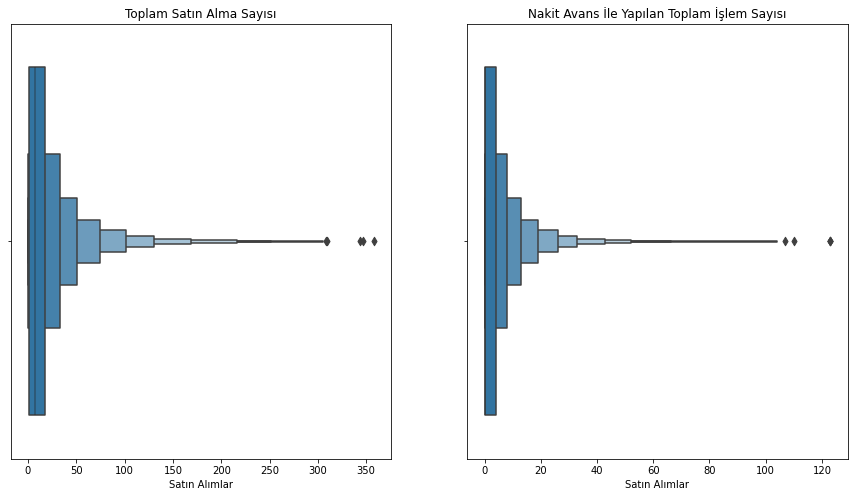

In [33]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(1,2,1)
sns.boxenplot(data['purchases_trx'])
plt.title('Toplam Satın Alma Sayısı')
plt.xlabel('Satın Alımlar')

plt.subplot(1,2,2)
sns.boxenplot(data['cash_advance_trx'])
plt.title('Nakit Avans İle Yapılan Toplam İşlem Sayısı')
plt.xlabel('Satın Alımlar')

plt.show()

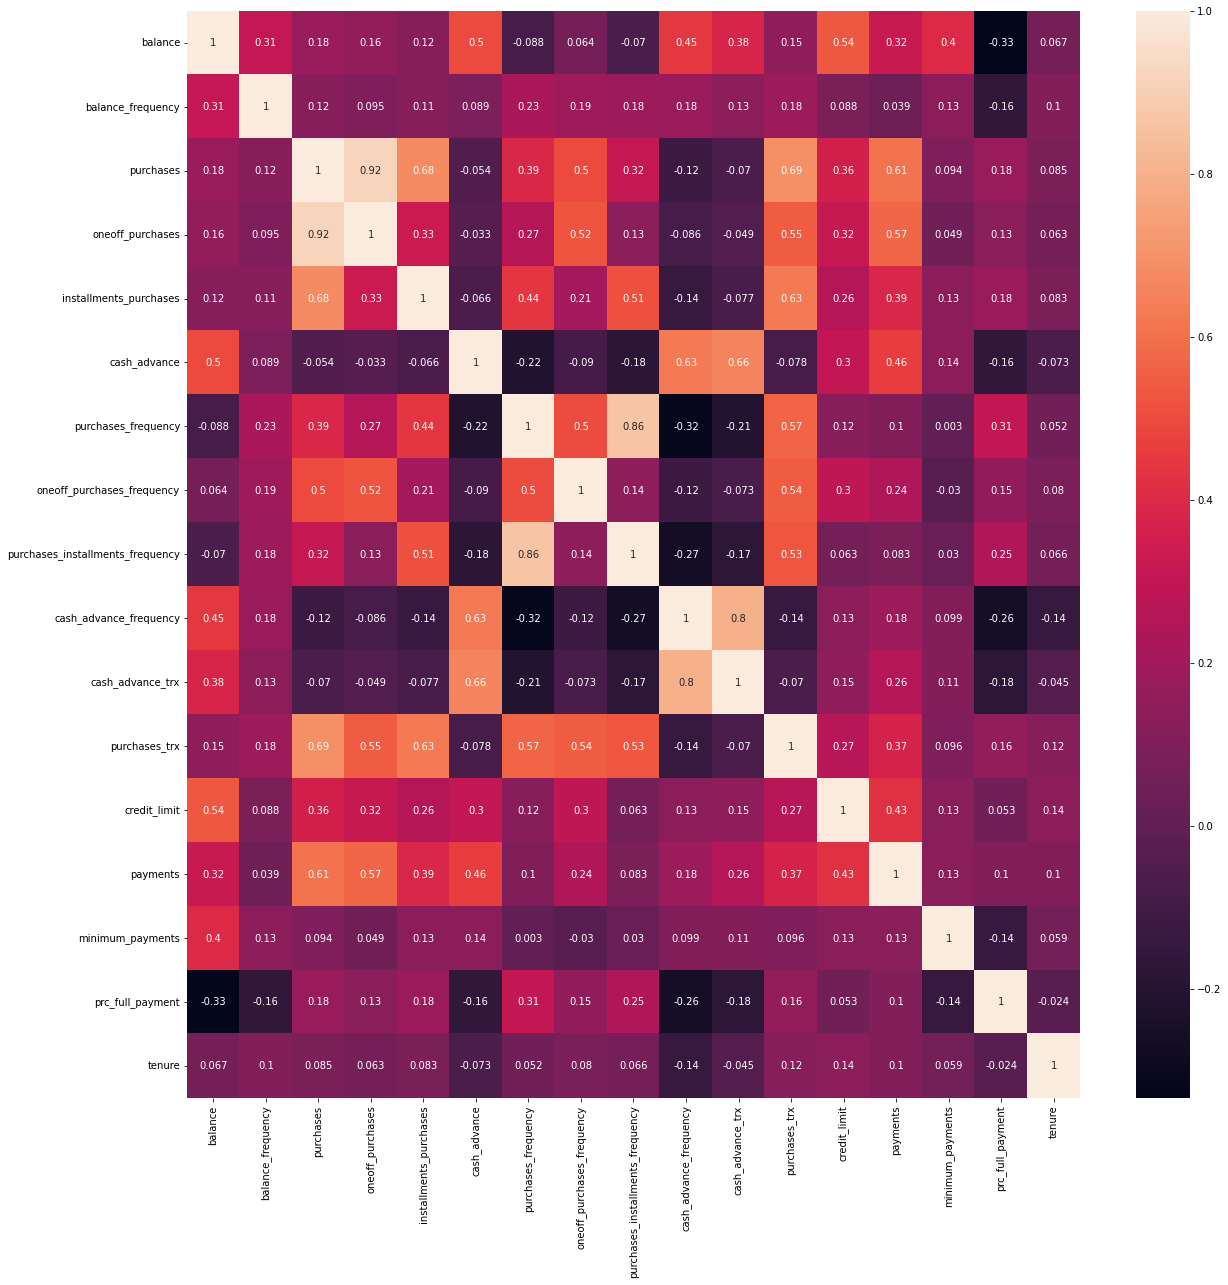

In [34]:
plt.figure(figsize=(20,20))
corr_data = data.corr()
sns.heatmap(corr_data,annot=True)
plt.show()

In [35]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled.shape

(8636, 17)

In [36]:
hier_cluster = linkage(data_scaled, method='ward')

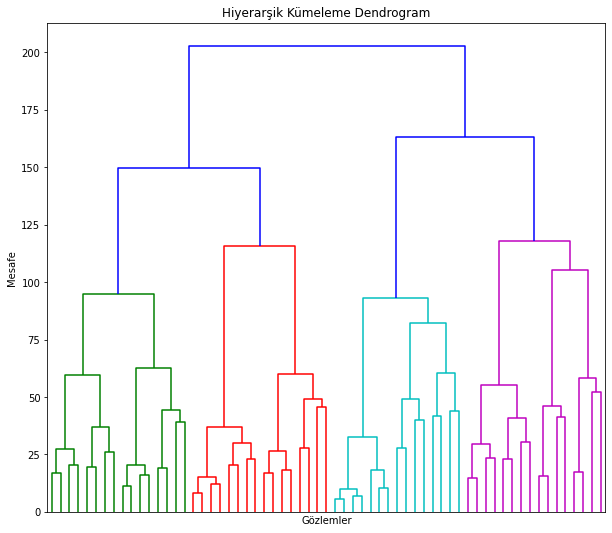

In [37]:
plt.figure(figsize=(10,9))
plt.title('Hiyerarşik Kümeleme Dendrogram')
plt.xlabel('Gözlemler')
plt.ylabel('Mesafe')
dendrogram(hier_cluster, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

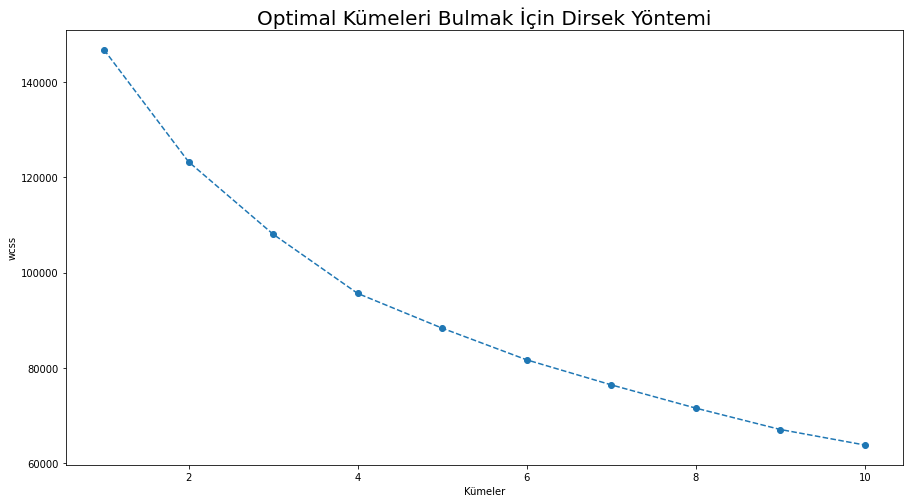

In [38]:
wcss= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(data_scaled)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss, marker='o', linestyle='--')
plt.title('Optimal Kümeleri Bulmak İçin Dirsek Yöntemi', fontsize =20)
plt.xlabel('Kümeler')
plt.ylabel('wcss')

plt.show()

In [39]:
# modeli 4 küme olarak ayarlayıp o şekilde tekrardan algoritmayı uyguluyoruz
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
label = km.fit_predict(data_scaled)

data['label'] = label

In [40]:
data['constant'] = 'constant'

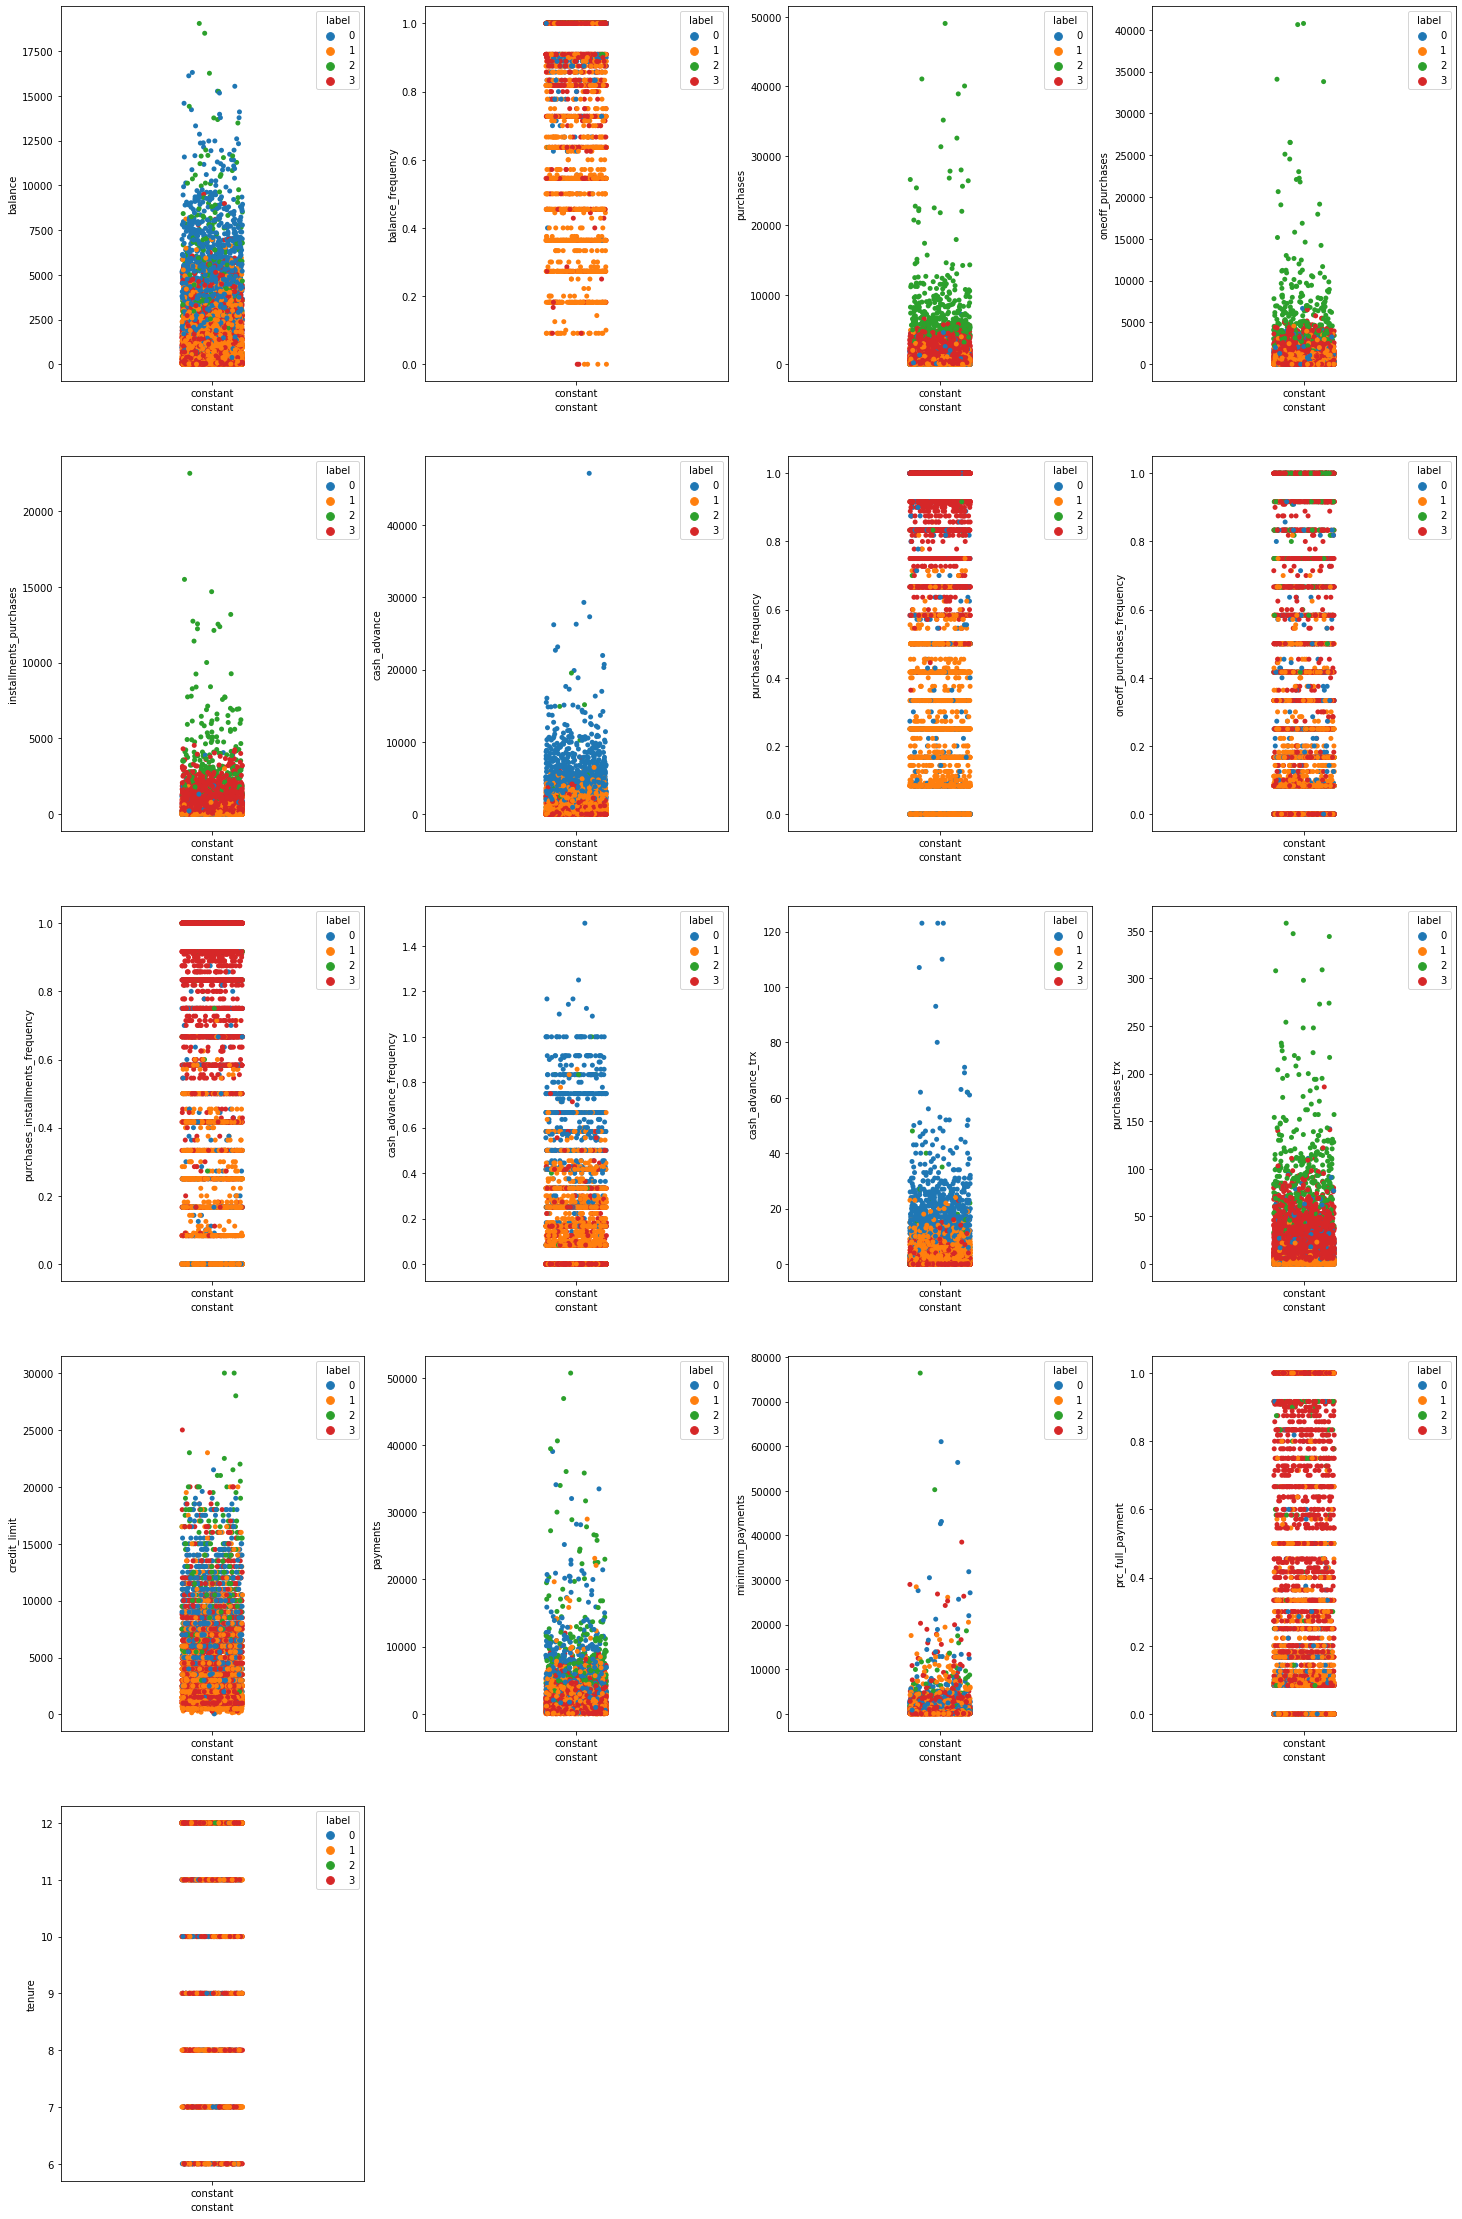

In [41]:
plt.rcParams['figure.figsize'] =(25,40)

for num in range(0,17):
    ax = plt.subplot(5,4,num+1)
    col = data.columns[num]
    sns.stripplot(data['constant'],data[col], ax=ax, hue=data['label'])
    plt.xlabel('constant')

plt.show()

In [42]:
pca = PCA(n_components = 7)  
pca.fit(data_scaled)

PCA(n_components=7)

In [43]:
data_scaled.shape

(8636, 17)

In [44]:
# x datasını 2 boyuta döüştürüyorum
x_pca = pca.transform(data_scaled)
x_pca.shape

(8636, 7)

In [45]:
#gerçek datayı ne kadar temsil ettiğine bakıyoruz
print("variance ratio: ", pca.explained_variance_ratio_)

variance ratio:  [0.27231177 0.20374308 0.08918334 0.07573609 0.06276618 0.05712786
 0.04916188]


In [46]:
#datamın ne kadaraını kaybettiğimizi öğreniyoruz 
print("sum: ",sum(pca.explained_variance_ratio_))

sum:  0.8100301906450046


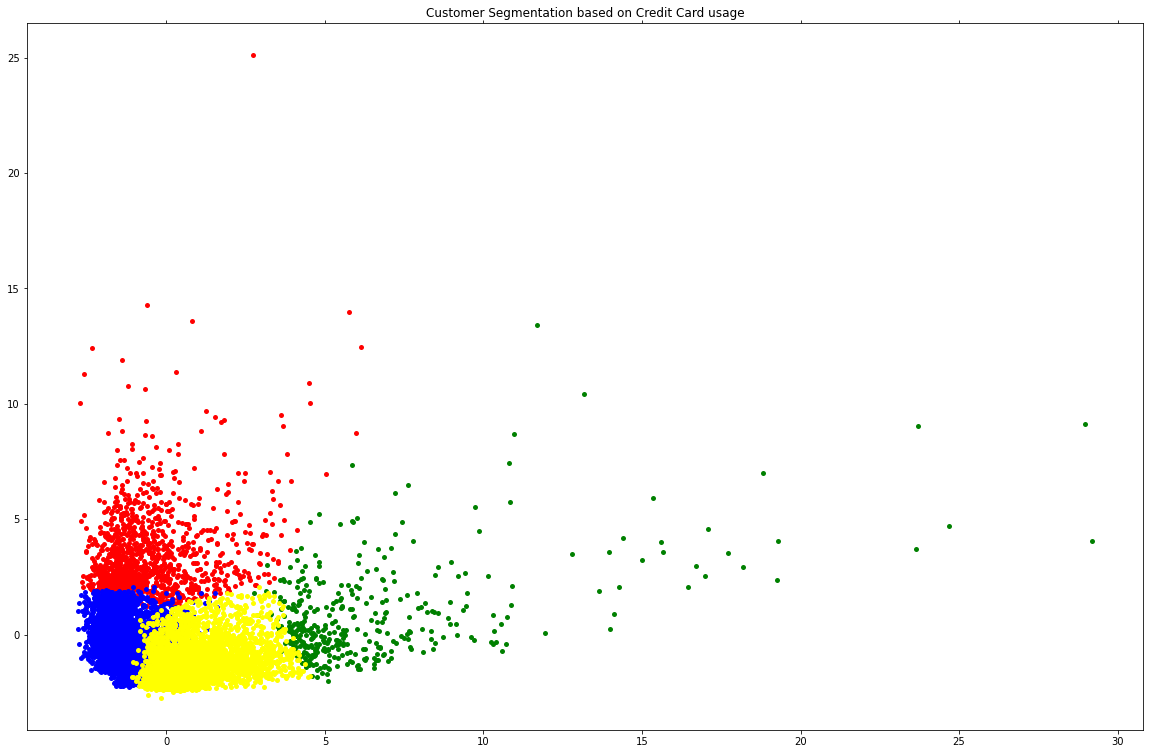

In [47]:
#data["p1"] = x_pca[:,0]
#data["p2"] = x_pca[:,1]

x = x_pca[:,0]
y = x_pca[:,1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow'}
  
data = pd.DataFrame({'x': x, 'y':y, 'label':data['label']}) 
groups = data.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.set_title("Customer Segmentation based on Credit Card usage")
plt.show()

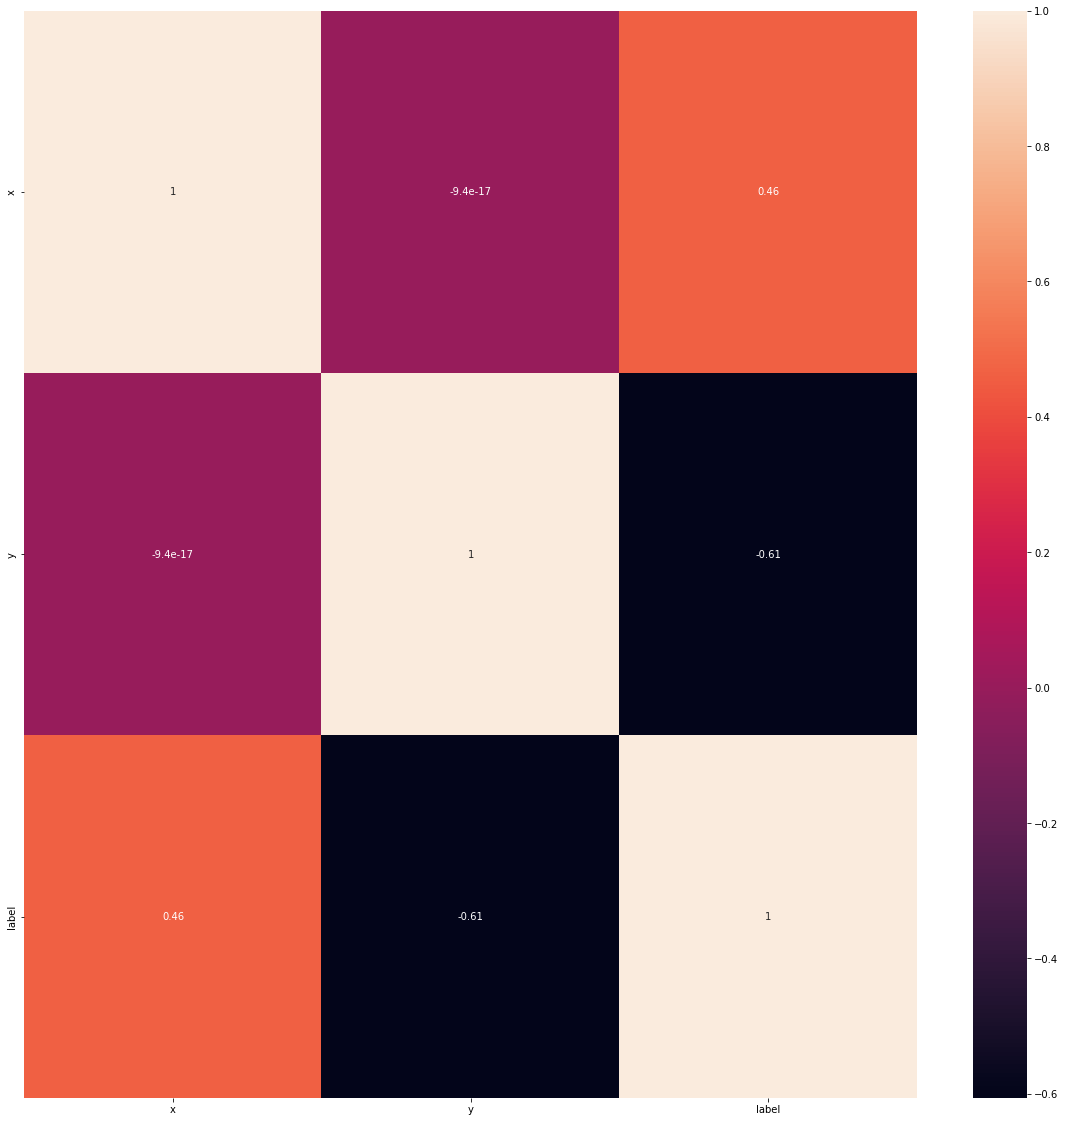

In [48]:
plt.figure(figsize=(20,20))
corr_pca = data.corr()
sns.heatmap(corr_pca,annot=True)
plt.show()